In [1]:
from nbandit.run import EpsilonGreedySampleAveragesAgent, SoftmaxAgent, generate_bandit

In [2]:
from matplotlib import pyplot as plt

In [3]:
n = 10
bandit = generate_bandit(n)

def plot_optimality_of_agent(agent):

    optimal_reward = max(list(map(lambda lever: lever[0], bandit)))

    rewards = []

    total_rewards = 0

    for step in range(1, 3001):
        reward, action = agent.step(bandit)
        total_rewards += reward

        rewards.append(total_rewards / (optimal_reward * step))

    plt.plot(rewards)
    plt.ylabel("% of optimal reward")
    plt.show()


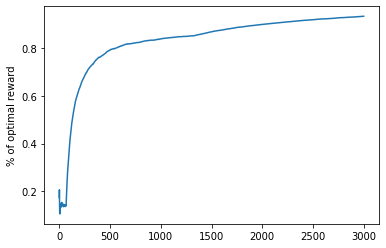

In [7]:
agent = EpsilonGreedySampleAveragesAgent(n, 0.01)
plot_optimality_of_agent(agent)

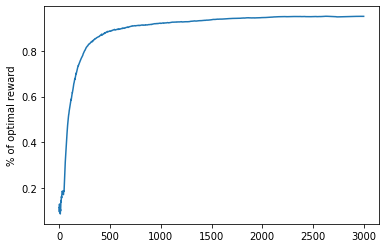

In [6]:
agent = EpsilonGreedySampleAveragesAgent(n, 0.1)
plot_optimality_of_agent(agent)

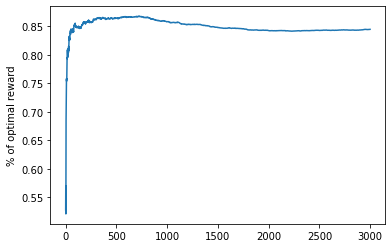

In [15]:
agent = SoftmaxAgent(n)
plot_optimality_of_agent(agent)